In [2]:
## 라이브러리 설정
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import re

In [3]:
# print ('버전: ', mpl.__version__)
# print ('설정 위치: ', mpl.matplotlib_fname())
# print ('설치 위치: ', mpl.__file__)
# print ('설정 위치: ', mpl.get_configdir())
# print ('캐시 위치: ', mpl.get_cachedir())
# print([(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'D2Coding' in f.name])

In [4]:
## 시각화 설정
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

path = '/home/alllhvhla/.local/share/fonts/D2Coding/D2CodingBold-Ver1.3.2-20180524.ttf'
font_name = font_manager.FontProperties(fname = path, size = 10).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
## data crawling with daum search engine

from time import sleep

unique_word = set()
iterator_num = 0
max_iterator_num = 1000
def crawling_related_word(queue, n):
    global unique_word, iterator_num
    if iterator_num > max_iterator_num:
        return
    if len(queue)==0 or n==0:
        print('크롤링 종료')
        return
    df = pd.DataFrame()
    next_queue = []
    print(queue)

    for word in queue:
        iterator_num += 1
        print(iterator_num)
        if iterator_num > max_iterator_num:
            break
        temp_df = pd.DataFrame()
        temp_list = []
        url = 'https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=' + word

        while True:
            try:
                response = requests.get(url)
                break
            except:
                print("sleeping...")
                sleep(5)

        if response.status_code == 200:
            html = response.text
            document = bs(html, 'html.parser')
            try:
                div_inner = document.find('div',class_='list_keyword type2')
                related_word_list = div_inner.find_all('span', class_='wsn')
            except:
                if pd.isna(div_inner):
                    try:
                        div_inner = document.find('div', class_='list_keyword')
                        related_word_list = div_inner.find_all('span',class_='wsn')
                    except:
                        print(word,'연관 검색어가 없습니다.')
                        related_word_list = []

        if len(related_word_list) == 0: continue
        
        for idx, related_word in enumerate(related_word_list):
            next_word = related_word_list[idx].text
            temp_list.append(next_word)
            if not next_word in unique_word:
                next_queue.append(next_word)
                unique_word.add(next_word)
            # print(related_word_list[idx].text)
            
        temp_df['sub_word'] = temp_list
        temp_df['sup_word'] = word
        df = pd.concat([df,temp_df],axis=0)
    df = pd.concat([df, crawling_related_word(next_queue, n-1)], axis=0)
    return df.reset_index(drop=True)

word_list = ['코로나19', "코로나바이러스", "위드코로나"]
for word in word_list: 
    unique_word.add(word)

df_crawl = crawling_related_word(word_list,3)

['코로나19', '코로나바이러스', '위드코로나']
1
2
3
['코로나19 확진자 현황', '코로나19 거리두기', '코로나19 세계 현황', '코로나19 단계', '코로나19 백신', '코로나19 증상', '코로나19 뜻', '코로나19 일본', '코로나19 치료제', '위드 코로나', '코로나19 예방수칙', '코로나19 대구', '코로나19 부산', '코로나19 3단계', '코로나19 광주', '코로나19 사망자', '코로나19 미국', '코로나19 2단계', '코로나 19 서울', '코로나19 바이러스', '코로나 바이러스 이미지', '코로나 바이러스 원인', '코로나 바이러스 증상', '코로나 바이러스 백신', '코로나 바이러스 사망자', '코로나 바이러스 중국', '코로나바이러스 마스크', '코로나 바이러스 19', '코로나 바이러스 현황', '코로나 바이러스 일본', '코로나 바이러스 사진', '신종 코로나 바이러스', '코로나 바이러스란', '코로나 바이러스 생존기간', '코로나 바이러스 잠복기', '코로나 바이러스 검사', '코로나 바이러스 치사율', '코로나 바이러스 단계', '코로나 바이러스박쥐', '우한 폐렴', '위드 코로나 11월', '위드코로나 시기', '위드코로나 발표', '위드 코로나 뜻', '위드코로나 마스크', '위드코로나 종교시설', '위드코로나 등교', '위드코로나 시행', '위드코로나 1단계', '위드코로나 자가격리', '위드코로나 확진자', '위드코로나 시작', '위드코로나 여행', '위드코로나 학교', '위드 코로나 2단계', '단계적 일상회복', '위드코로나 식당', '위드코로나 관련주', '위드코로나 방역지침', '위드코로나 초안']
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
5

In [12]:
df_crawl

,sub_word,sup_word
0,코로나19 확진자 현황,코로나19
1,코로나19 거리두기,코로나19
2,코로나19 세계 현황,코로나19
3,코로나19 단계,코로나19
4,코로나19 백신,코로나19
...,...,...
11205,위드 코로나 제한,위드 코로나 불가능
11206,위드 코로나 내용,위드 코로나 불가능
11207,위드 코로나 반대,위드 코로나 불가능
11208,위드 코로나 중단,위드 코로나 불가능


In [13]:
## 데이터프레임 저장 for 형태소 분석
df_crawl.to_csv("data_from_daum1.csv", index=False)

In [14]:
## DTM 파일 읽어오기
dtm = pd.read_csv("DTM1.csv")
dtm

,1,10,11,1182,1185,12,13,1339,15,16,...,후보,후유증,휴가,휴대폰,휴메딕스,휴업,휴장,흉통,흡연,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
## text network: 단어쌍 만들기
from tqdm import tqdm

dataset = dtm.copy()
column_list = dataset.columns
word_length = len(column_list)

count_dict = {}

for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
  tmp = dataset.loc[doc_number] # 현재 문서의 단어 출현 빈도 데이터를 가져온다. 
  for i, word1 in enumerate(column_list): 
    if tmp[word1]: # 현재 문서에 첫번째 단어가 존재할 경우 
      for j in range(i + 1, word_length): 
        if tmp[column_list[j]]: # 현재 문서에 두번째 단어가 존재할 경우 
          count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])

# count_list에 word1, word2, frequency 형태로 저장할 것이다.
count_list = []

for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])

# 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

# 이 작업이 오래 걸리기 때문에 csv파일로 저장 후 사용하는 것을 추천한다.
df.to_csv('networkx.csv', encoding='utf-8-sig')


단어쌍 만들기 진행중: 100%|██████████| 11210/11210 [03:02<00:00, 61.55it/s]


In [16]:
df

,word1,word2,freq
0,19,코로나,1649
1,진자,확,1218
2,진자,코로나,1147
3,코로나,확,1147
4,위드,코로나,1120
...,...,...,...
10804,중학교,진월,1
10805,초등학교,효,1
10806,다압,초등학교,1
10807,곡,초등학교,1


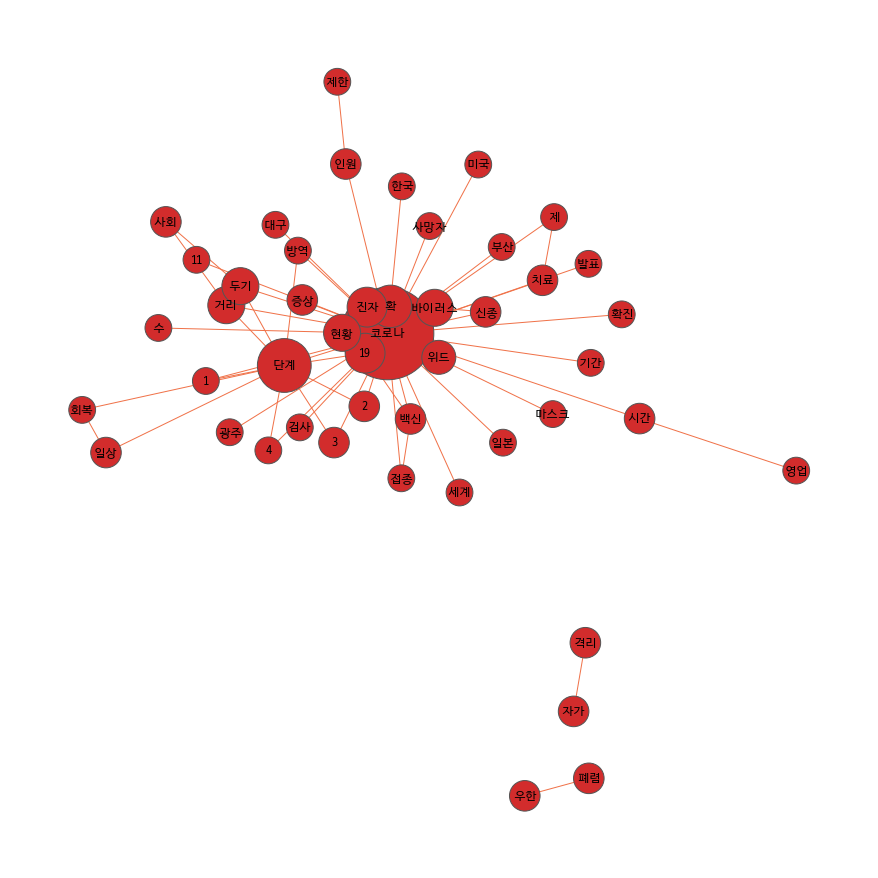

In [22]:
## text network: 그리기
import networkx as nx
import operator

dataset = df.copy()

G_centrality = nx.Graph()

for ind in range(len(np.where(dataset['freq'] >= 100)[0])):
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))
  
dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True) 
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True) 
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True) 
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True) 
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

G = nx.Graph()

for i in range(len(sorted_pgr)): 
  G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

for ind in range(len(np.where(dataset['freq'] >= 100)[0])):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize'] * 10000+500 for node in G]

pos = nx.spring_layout(G, k=4, iterations=100)
options = { 'edge_color': '#F07249', 'width': 1, 'with_labels': True, 'font_weight': 'regular', 'node_color':"#D22C2C", 'font_color':"#000000"}

plt.figure(figsize=(12, 12))

nx.draw(G, node_size=sizes, pos=pos, **options, font_family=font_name) # font_family로 폰트 등록 

# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels )
 
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.savefig("Graph.png", format="PNG")
plt.show()